## Example Simulation and Phase Diagram
### Testing our GC MC Simulation to Ensure that the Code Works Properly
### Identical to Scenario 1: Ideal Mixture of Nitrogen and Hydrogen

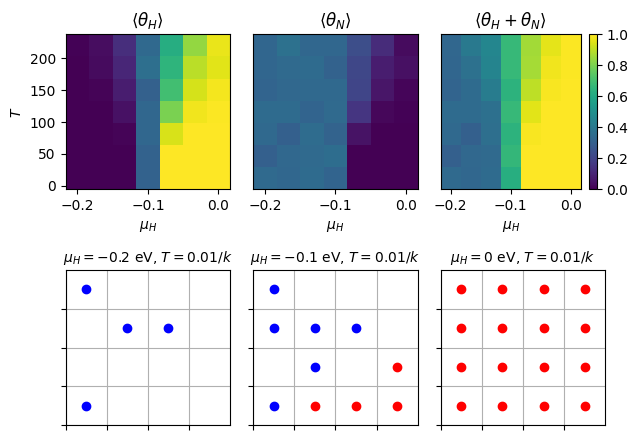

In [6]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import mc_functions as mc
from scipy.constants import k, eV
from matplotlib import animation
from matplotlib.colors import ListedColormap, BoundaryNorm
import os

#Define constants
kB = k / eV

# Parameters
size = 4
n_steps = 10000
mus_A = np.linspace(-0.2, 0, 7)
Ts = np.linspace(0.001, 0.019, 7)
params = []
for mu_A in mus_A:
    for T in Ts:
        params.append({
            'epsilon_A': -0.1,
            'epsilon_B': -0.1,
            'epsilon_AA': 0,
            'epsilon_BB': 0,
            'epsilon_AB': 0,
            'mu_A': mu_A,
            'mu_B': -0.1,
            'T': T  # Temperature (in units of k)
        })

# Run the simulation
np.random.seed(42)
final_lattice = np.zeros((len(mus_A), len(Ts), size, size))
mean_coverage_A = np.zeros((len(mus_A), len(Ts)))
mean_coverage_B = np.zeros((len(mus_A), len(Ts)))
for i, param in enumerate(params):
    lattice, coverage_A, coverage_B = mc.run_simulation(size, n_steps, param)
    final_lattice[i // len(Ts), i % len(Ts)] = lattice
    mean_coverage_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mean_coverage_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

# Plot the T-mu_A phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts / kB, mean_coverage_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_H \rangle$')
axs[0].set_xlabel(r'$\mu_H$')
axs[0].set_ylabel(r'$T$')

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts / kB, mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_N \rangle$')
axs[1].set_xlabel(r'$\mu_H$')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts / kB, mean_coverage_A.T + mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_H + \theta_N \rangle$')
axs[2].set_xlabel(r'$\mu_H$')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)

# Plot the final lattice configuration

# mu_A = -0.2 eV and T = 0.01 / k
axs[3] = mc.plot_lattice(final_lattice[0, 3], axs[3], r'$\mu_H = -0.2$ eV, $T = 0.01 / k$')

# mu_A = -0.1 eV and T = 0.01 / k
axs[4] = mc.plot_lattice(final_lattice[3, 3], axs[4], r'$\mu_H = -0.1$ eV, $T = 0.01 / k$')

# mu_A = 0 eV and T = 0.01 / k
axs[5] = mc.plot_lattice(final_lattice[6, 3], axs[5], r'$\mu_H = 0$ eV, $T = 0.01 / k$')

plt.tight_layout()

# Save the plot
fig.savefig("images/scenario1.png", dpi=300, bbox_inches='tight')

plt.show()

Note: the provided code from the wexlergroup.io Github gave the temperature in terms of units for eV rather than K. The above code provided T in units of eV, so we need to adjust the provided sample code to account for temperature in units of K.

## Scenario 2: Repulsive Interactions between Nitrogen and Hydrogen

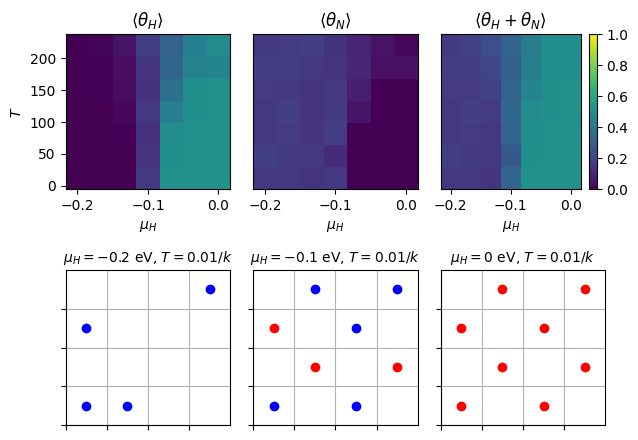

In [7]:
# Parameters
params = []
for mu_A in mus_A:
    for T in Ts:
        params.append({
            'epsilon_A': -0.1,
            'epsilon_B': -0.1,
            'epsilon_AA': 0.05,
            'epsilon_BB': 0.05,
            'epsilon_AB': 0.05,
            'mu_A': mu_A,
            'mu_B': -0.1,
            'T': T  # Temperature (in units of k)
        })

# Run the simulation
final_lattice = np.zeros((len(mus_A), len(Ts), size, size))
mean_coverage_A = np.zeros((len(mus_A), len(Ts)))
mean_coverage_B = np.zeros((len(mus_A), len(Ts)))
for i, param in enumerate(params):
    lattice, coverage_A, coverage_B = mc.run_simulation(size, n_steps, param)
    final_lattice[i // len(Ts), i % len(Ts)] = lattice
    mean_coverage_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mean_coverage_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

# Plot the T-mu_A phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts/kB, mean_coverage_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_H \rangle$')
axs[0].set_xlabel(r'$\mu_H$')
axs[0].set_ylabel(r'$T$')

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts/kB, mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_N \rangle$')
axs[1].set_xlabel(r'$\mu_H$')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts/kB, mean_coverage_A.T + mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_H + \theta_N \rangle$')
axs[2].set_xlabel(r'$\mu_H$')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)

# Plot the final lattice configuration

# mu_A = -0.2 eV and T = 0.01 / k
axs[3] = mc.plot_lattice(final_lattice[0, 3], axs[3], r'$\mu_H = -0.2$ eV, $T = 0.01 / k$')

# mu_A = -0.1 eV and T = 0.01 / k
axs[4] = mc.plot_lattice(final_lattice[3, 3], axs[4], r'$\mu_H = -0.1$ eV, $T = 0.01 / k$')

# mu_A = 0 eV and T = 0.01 / k
axs[5] = mc.plot_lattice(final_lattice[6, 3], axs[5], r'$\mu_H = 0$ eV, $T = 0.01 / k$')

plt.tight_layout()

#Save image
fig.savefig("images/scenario2.png", dpi=300, bbox_inches='tight')

plt.show()

## Scenario 3: Attractive Interactions between Nitrogen and Hydrogen

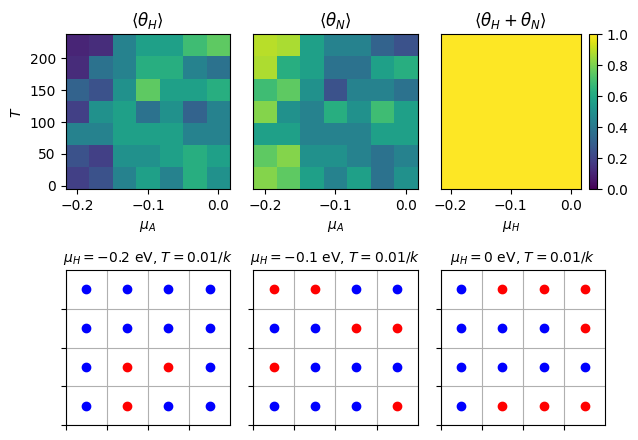

In [8]:
# Parameters
params = []
for mu_A in mus_A:
    for T in Ts:
        params.append({
            'epsilon_A': -0.1,
            'epsilon_B': -0.1,
            'epsilon_AA': -0.05,
            'epsilon_BB': -0.05,
            'epsilon_AB': -0.05,
            'mu_A': mu_A,
            'mu_B': -0.1,
            'T': T  # Temperature (in units of k)
        })

# Run the simulation
np.random.seed(42)
final_lattice = np.zeros((len(mus_A), len(Ts), size, size))
mean_coverage_A = np.zeros((len(mus_A), len(Ts)))
mean_coverage_B = np.zeros((len(mus_A), len(Ts)))
for i, param in enumerate(params):
    lattice, coverage_A, coverage_B = mc.run_simulation(size, n_steps, param)
    final_lattice[i // len(Ts), i % len(Ts)] = lattice
    mean_coverage_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mean_coverage_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

# Plot the T-mu_A phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts/kB, mean_coverage_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_H \rangle$')
axs[0].set_xlabel(r'$\mu_A$')
axs[0].set_ylabel(r'$T$')

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts/kB, mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_N \rangle$')
axs[1].set_xlabel(r'$\mu_A$')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts/kB, mean_coverage_A.T + mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_H + \theta_N \rangle$')
axs[2].set_xlabel(r'$\mu_H$')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)

# Plot the final lattice configuration

# mu_A = -0.2 eV and T = 0.01 / k
axs[3] = mc.plot_lattice(final_lattice[0, 3], axs[3], r'$\mu_H = -0.2$ eV, $T = 0.01 / k$')

# mu_A = -0.1 eV and T = 0.01 / k
axs[4] = mc.plot_lattice(final_lattice[3, 3], axs[4], r'$\mu_H = -0.1$ eV, $T = 0.01 / k$')

# mu_A = 0 eV and T = 0.01 / k
axs[5] = mc.plot_lattice(final_lattice[6, 3], axs[5], r'$\mu_H = 0$ eV, $T = 0.01 / k$')

plt.tight_layout()

#Save image
fig.savefig("images/scenario3.png", dpi=300, bbox_inches='tight')

plt.show()

## Scenario 4: Immiscible Nitrogen and Hydrogen

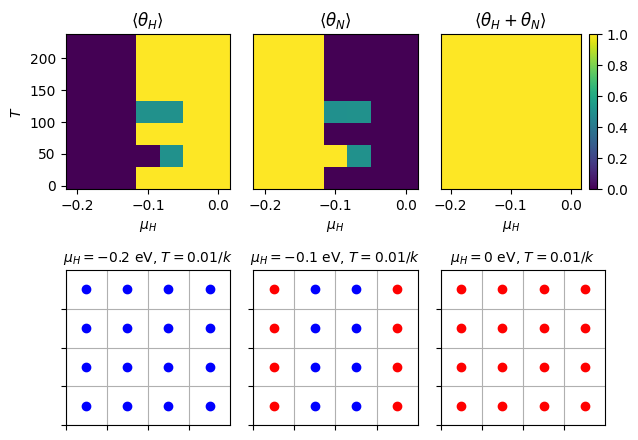

In [9]:
# Parameters
params = []
for mu_A in mus_A:
    for T in Ts:
        params.append({
            'epsilon_A': -0.1,
            'epsilon_B': -0.1,
            'epsilon_AA': -0.05,
            'epsilon_BB': -0.05,
            'epsilon_AB': 0.05,
            'mu_A': mu_A,
            'mu_B': -0.1,
            'T': T  # Temperature (in units of k)
        })

# Run the simulation
np.random.seed(42)
final_lattice = np.zeros((len(mus_A), len(Ts), size, size))
mean_coverage_A = np.zeros((len(mus_A), len(Ts)))
mean_coverage_B = np.zeros((len(mus_A), len(Ts)))
for i, param in enumerate(params):
    lattice, coverage_A, coverage_B= mc.run_simulation(size, n_steps, param)
    final_lattice[i // len(Ts), i % len(Ts)] = lattice
    mean_coverage_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mean_coverage_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

# Plot the T-mu_A phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts/kB, mean_coverage_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_H \rangle$')
axs[0].set_xlabel(r'$\mu_H$')
axs[0].set_ylabel(r'$T$')

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts/kB, mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_N \rangle$')
axs[1].set_xlabel(r'$\mu_H$')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts/kB, mean_coverage_A.T + mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_H + \theta_N \rangle$')
axs[2].set_xlabel(r'$\mu_H$')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)

# Plot the final lattice configuration

# mu_A = -0.2 eV and T = 0.01 / k
axs[3] = mc.plot_lattice(final_lattice[0, 3], axs[3], r'$\mu_H = -0.2$ eV, $T = 0.01 / k$')

# mu_A = -0.1 eV and T = 0.01 / k
axs[4] = mc.plot_lattice(final_lattice[3, 3], axs[4], r'$\mu_H = -0.1$ eV, $T = 0.01 / k$')

# mu_A = 0 eV and T = 0.01 / k
axs[5] = mc.plot_lattice(final_lattice[6, 3], axs[5], r'$\mu_H = 0$ eV, $T = 0.01 / k$')

plt.tight_layout()

#Save image
fig.savefig("images/scenario4.png", dpi=300, bbox_inches='tight')

plt.show()

## Scenario 5: “Like Dissolves Unlike” Scenario


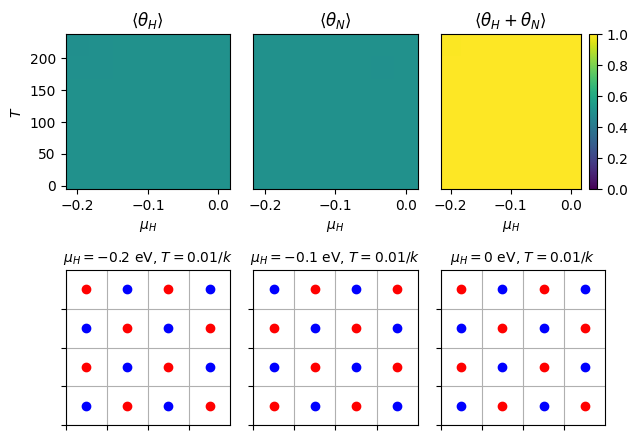

In [10]:
# Parameters
params = []
for mu_A in mus_A:
    for T in Ts:
        params.append({
            'epsilon_A': -0.1,
            'epsilon_B': -0.1,
            'epsilon_AA': 0.05,
            'epsilon_BB': 0.05,
            'epsilon_AB': -0.05,
            'mu_A': mu_A,
            'mu_B': -0.1,
            'T': T  # Temperature (in units of k)
        })

# Run the simulation
np.random.seed(42)
final_lattice = np.zeros((len(mus_A), len(Ts), size, size))
mean_coverage_A = np.zeros((len(mus_A), len(Ts)))
mean_coverage_B = np.zeros((len(mus_A), len(Ts)))
for i, param in enumerate(params):
    lattice, coverage_A, coverage_B= mc.run_simulation(size, n_steps, param)
    final_lattice[i // len(Ts), i % len(Ts)] = lattice
    mean_coverage_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mean_coverage_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

# Plot the T-mu_A phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts/kB, mean_coverage_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_H \rangle$')
axs[0].set_xlabel(r'$\mu_H$')
axs[0].set_ylabel(r'$T$')

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts/kB, mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_N \rangle$')
axs[1].set_xlabel(r'$\mu_H$')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts/kB, mean_coverage_A.T + mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_H + \theta_N \rangle$')
axs[2].set_xlabel(r'$\mu_H$')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)

# Plot the final lattice configuration

# mu_A = -0.2 eV and T = 0.01 / k
axs[3] = mc.plot_lattice(final_lattice[0, 3], axs[3], r'$\mu_H = -0.2$ eV, $T = 0.01 / k$')

# mu_A = -0.1 eV and T = 0.01 / k
axs[4] = mc.plot_lattice(final_lattice[3, 3], axs[4], r'$\mu_H = -0.1$ eV, $T = 0.01 / k$')

# mu_A = 0 eV and T = 0.01 / k
axs[5] = mc.plot_lattice(final_lattice[6, 3], axs[5], r'$\mu_H = 0$ eV, $T = 0.01 / k$')

plt.tight_layout()

#Save image
fig.savefig("images/scenario5.png", dpi=300, bbox_inches='tight')

plt.show()